In [1]:
# 1. Instalar YOLOv8 (si no está instalado)
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.7 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



image 1/1 /content/image1.jpg: 448x640 13 persons, 3 cars, 1 truck, 1 umbrella, 828.3ms
Speed: 12.2ms preprocess, 828.3ms inference, 106.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/image2.jpg: 448x640 1 person, 14 cars, 1 bus, 3 trucks, 2 traffic lights, 612.0ms
Speed: 3.4ms preprocess, 612.0ms inference, 82.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/image3.jpg: 448x640 1 person, 1 tie, 598.5ms
Speed: 3.6ms preprocess, 598.5ms inference, 7.8ms postprocess per image at shape (1, 3, 448, 640)


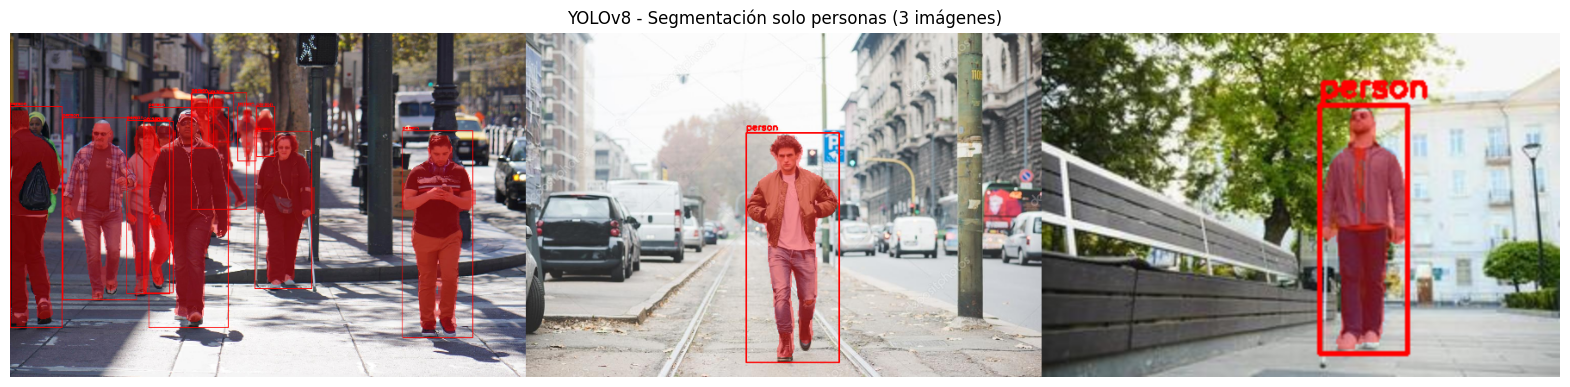

In [2]:


from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests
from pathlib import Path

# 2. Descargar imágenes desde GitHub
base_url = "https://raw.githubusercontent.com/Gerardo-Huerta-Esc/Maestria_Inteligencia_Artificial/master/Percepcion_computacional/Mask_RCNN/images"
filenames = ["image1.jpg", "image2.jpg", "image3.jpg"]

for fname in filenames:
    url = f"{base_url}/{fname}"
    resp = requests.get(url)
    with open(fname, "wb") as f:
        f.write(resp.content)

# 3. Cargar modelo YOLOv8-seg
model = YOLO("yolov8s-seg.pt")

# 4. Aplicar segmentación solo a personas en cada imagen
filtered_images = []
for fname in filenames:
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    results = model(fname)[0]

    for mask, cls, box in zip(results.masks.data, results.boxes.cls, results.boxes.xyxy):
        if int(cls) == 0:
            mask_np = mask.cpu().numpy()
            mask_resized = cv2.resize(mask_np, (w, h), interpolation=cv2.INTER_NEAREST)
            mask_bool = mask_resized > 0.5
            red = np.array([0, 0, 255], dtype=np.uint8)
            alpha = 0.6
            img[mask_bool] = (alpha * img[mask_bool] + (1 - alpha) * red).astype(np.uint8)
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(img, "person", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    filtered_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 5. Unir visualmente las tres imágenes
height = 400
resized = [cv2.resize(im, (int(im.shape[1] * height / im.shape[0]), height)) for im in filtered_images]
combined = np.hstack(resized)

# 6. Mostrar resultado final
plt.figure(figsize=(20,10))
plt.imshow(combined)
plt.title("YOLOv8 - Segmentación solo personas (3 imágenes)")
plt.axis('off')
plt.show()


